In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os
import shutil
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [84]:
start_date = '2006-01-01'
end_date = '2023-12-31'

In [8]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['path.simplify']    = True
plt.rcParams['font.family']  = 'monospace'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 3    
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# adding grid
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5

In [3]:
labels = [
    "Mean Sea Level Pressure",
    "2m Temperature",
    "2m Dew Point Temperature",
    "Top Net Thermal Radiation",
    "Total Cloud Cover",
    "Total Precipitation",
    "100m Wind Speed",
    "10m Wind Speed",
    "Relative Humidity"
]
units = [
    "hPa",
    "°C",
    "°C",
    "J/m^2",
    "%",
    "mm",
    "m/s",
    "m/s",
    "%"

]
colors =[
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22"
]

months = [
    'Jan',
    'Feb',
    'Mar',
    'Apr',
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec'
]

In [4]:
filename = '../data/meteoro_LNA/2006_2023.txt'

In [5]:
#Definiendo nombres de la coulumna e  a Função para formatar data e hora


def format_date(row):
    day, month, year = row['date'].split('/')
    year = f"20{year}"  # Adicionando o prefixo "20" ao ano
    hour, minute = row['time'].split(':')
    hour = hour.zfill(2)
    minute = minute.zfill(2)
    return f"{year}/{month}/{day} {hour}:{minute}"

names=['date','time','temp_out','hi_temp','low_temp','out_hum','dew_pt','wind_speed',
       'wind_dir','win_run','hi_speed','wind_chill','heat_index','THW_index','bar','rain',
       'heat_DD','cool_DD','in_temp','in_hum','in_dew','in_heat','arc_int']


# Lendo o arquivo CSV e atribuindo os nomes  das colunas

data = pd.read_csv(filename, names=names,skiprows=2, delimiter='\t', header=None,)

data.head()

/tmp/ipykernel_51092/1080827182.py:19: DtypeWarning: Columns (2,3,4,5,6,11,12,13,14,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=names,skiprows=2, delimiter='\t', header=None,)


,date,time,temp_out,hi_temp,low_temp,out_hum,dew_pt,wind_speed,wind_dir,win_run,...,THW_index,bar,rain,heat_DD,cool_DD,in_temp,in_hum,in_dew,in_heat,arc_int
0,01/09/06,0:05,17.9,17.9,17.8,68,11.9,27.4,ESE,2.28,...,14.7,1010.6,0.0,0.002,0.000,20.6,43,7.5,19.4,5
1,01/09/06,0:10,17.8,17.8,17.8,68,11.8,25.7,ESE,2.15,...,14.8,1010.6,0.0,0.002,0.000,20.5,44,7.8,19.4,5
2,01/09/06,0:15,17.8,17.8,17.8,68,11.8,29.0,ESE,2.41,...,14.4,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
3,01/09/06,0:20,17.8,17.9,17.8,68,11.8,30.6,ESE,2.55,...,14.3,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
4,01/09/06,0:25,17.9,17.9,17.9,68,12.0,30.6,ESE,2.55,...,14.4,1010.0,0.0,0.001,0.000,20.4,44,7.8,19.3,5


In [6]:
# criar a coluna 'datetime'
data['datetime'] = data.apply(lambda row: format_date(row), axis=1)

# Convertendo a coluna 'datetime' para o tipo datetime
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index("datetime", drop=True).sort_index()

# Removendo as colunas originais 'date' e 'time'
data.drop(["date", "time"], inplace=True, axis=1)

data.head()

,temp_out,hi_temp,low_temp,out_hum,dew_pt,wind_speed,wind_dir,win_run,hi_speed,wind_chill,...,THW_index,bar,rain,heat_DD,cool_DD,in_temp,in_hum,in_dew,in_heat,arc_int
datetime,,,,,,,,,,,,,,,,,,,,,
2006-09-01 00:05:00,17.9,17.9,17.8,68,11.9,27.4,ESE,2.28,32.2,14.8,...,14.7,1010.6,0.0,0.002,0.000,20.6,43,7.5,19.4,5
2006-09-01 00:10:00,17.8,17.8,17.8,68,11.8,25.7,ESE,2.15,32.2,14.9,...,14.8,1010.6,0.0,0.002,0.000,20.5,44,7.8,19.4,5
2006-09-01 00:15:00,17.8,17.8,17.8,68,11.8,29.0,ESE,2.41,32.2,14.6,...,14.4,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
2006-09-01 00:20:00,17.8,17.9,17.8,68,11.8,30.6,ESE,2.55,33.8,14.5,...,14.3,1010.0,0.0,0.002,0.000,20.4,44,7.8,19.3,5
2006-09-01 00:25:00,17.9,17.9,17.9,68,12.0,30.6,ESE,2.55,35.4,14.6,...,14.4,1010.0,0.0,0.001,0.000,20.4,44,7.8,19.3,5


In [7]:
# Convert numerical variables into float
numerical_variables = [
    'temp_out',
    'hi_temp',
    'low_temp',
    'out_hum',
    'dew_pt',
    'wind_speed',
    'win_run',
    'hi_speed',
    'wind_chill',
    'heat_index',
    'THW_index',
    'bar',
    'rain',
    'heat_DD',
    'cool_DD',
    'in_temp',
    'in_hum',
    'in_dew',
    'in_heat',
    'arc_int'
]
for variable in numerical_variables:
    # data[variable] = data[variable].astype(object)
    data[variable] = data[variable].replace('---', None) 
    data[variable] = data[variable].replace('------', None)
    data[variable] = data[variable].replace('', None) 
    data[variable] = data[variable].astype(np.float32)
data = data[['temp_out', 'dew_pt', 'wind_speed', 'rain']]
data.head()

,temp_out,dew_pt,wind_speed,rain
datetime,,,,
2006-09-01 00:05:00,17.900000,11.9,27.400000,0.0
2006-09-01 00:10:00,17.799999,11.8,25.700001,0.0
2006-09-01 00:15:00,17.799999,11.8,29.000000,0.0
2006-09-01 00:20:00,17.799999,11.8,30.600000,0.0
2006-09-01 00:25:00,17.900000,12.0,30.600000,0.0


In [50]:
df = data.reset_index().copy()
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['season'] = df['datetime'].dt.month.apply(lambda x: (x%12 + 3)//3)
# diurnal or nocturnal cycle
df['cycle'] = df['hour'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
season_labels = {1: 'Summer', 2: 'Fall', 3: 'Winter', 4: 'Spring'}
df['season'] = df['season'].map(season_labels)
df.head()

,datetime,temp_out,dew_pt,wind_speed,rain,hour,month,season,cycle
0,2006-09-01 00:05:00,17.900000,11.9,27.400000,0.0,0,9,Spring,night
1,2006-09-01 00:10:00,17.799999,11.8,25.700001,0.0,0,9,Spring,night
2,2006-09-01 00:15:00,17.799999,11.8,29.000000,0.0,0,9,Spring,night
3,2006-09-01 00:20:00,17.799999,11.8,30.600000,0.0,0,9,Spring,night
4,2006-09-01 00:25:00,17.900000,12.0,30.600000,0.0,0,9,Spring,night


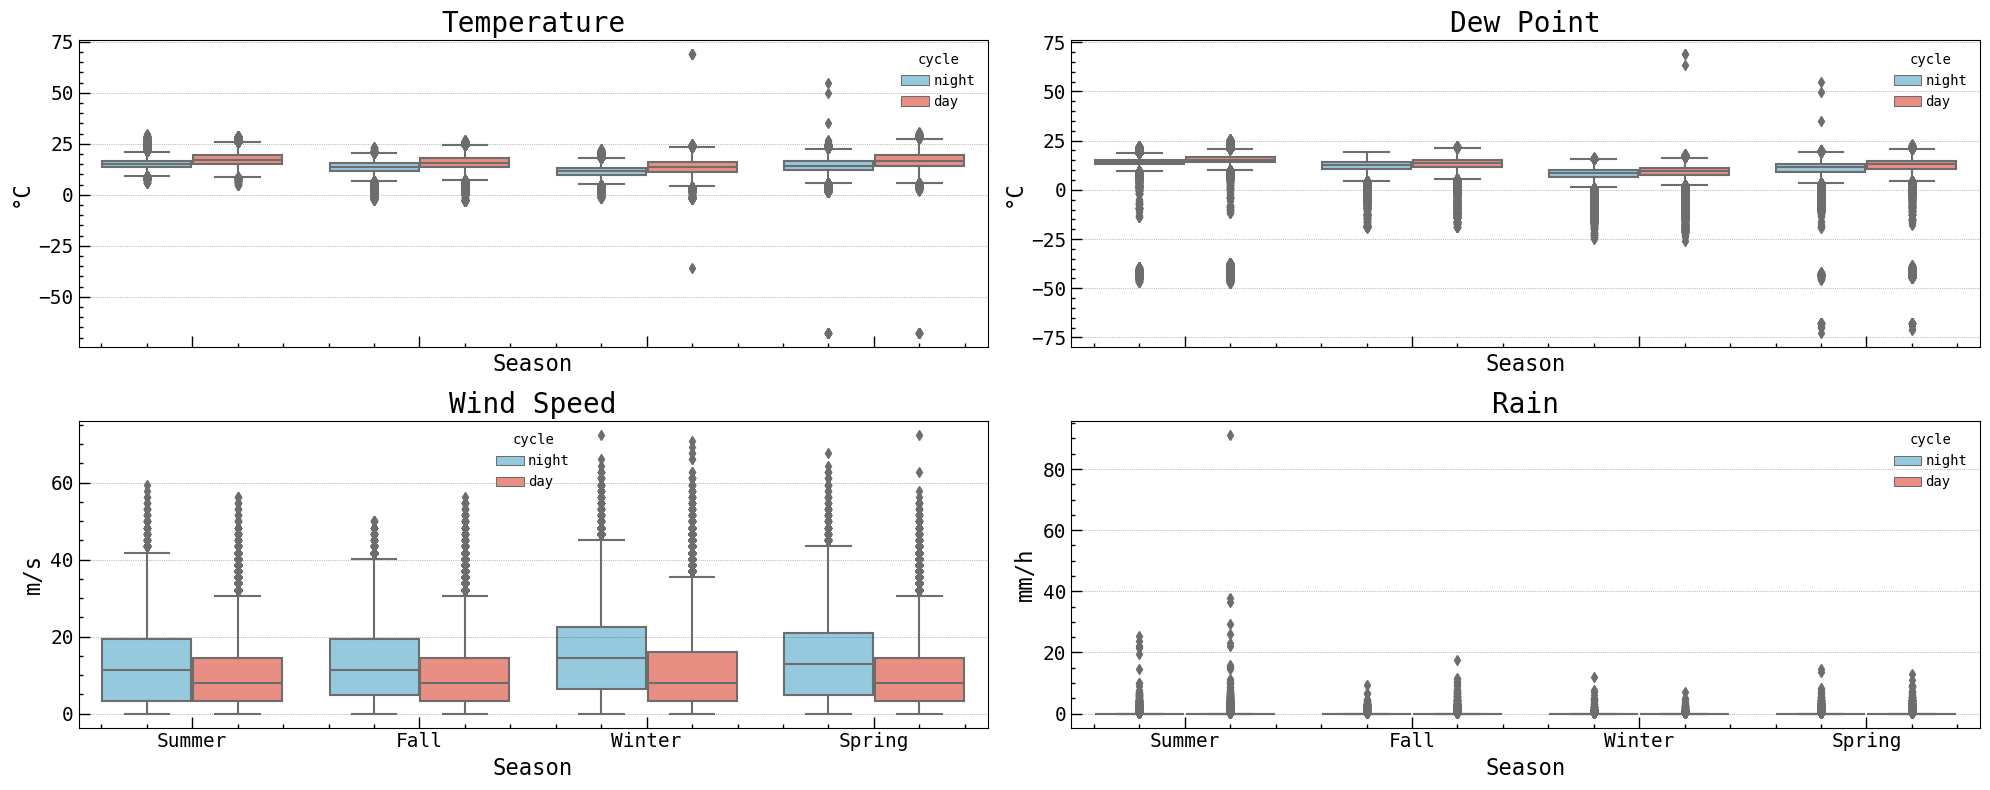

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(20, 8), sharex=True)

variables = ['temp_out', 'dew_pt', 'wind_speed', 'rain']
vlabels = ['Temperature', 'Dew Point', 'Wind Speed', 'Rain']
vunits = ['°C', '°C', 'm/s', 'mm/h']
colors_cycle = ['skyblue', 'salmon']
for i, variable in enumerate(variables):
    ax = axs.flat[i]
    day_data = df[df['cycle'] == 'day']
    night_data = df[df['cycle'] == 'night']
    combined_data = df[df['cycle'].isin(['day', 'night'])]

    # plot grouped (day/night) boxplot in the same axis each axis is season
    sns.boxplot(x='season', y=variable, hue='cycle', data=combined_data, ax=ax, palette=['skyblue', 'salmon'])
    ax.set_title(vlabels[i])
    ax.set_ylabel(vunits[i])
    ax.set_xlabel('Season')
    ax.set_xticklabels(['Summer', 'Fall', 'Winter', 'Spring'])

plt.tight_layout()

In [49]:
df.groupby('season').size()

season
1    260483
2    270598
3    320901
4    342531
dtype: int64

In [110]:
fig, axs = plt.subplots(2, 2, figsize=(20, 8), sharex=True)

variables = ['temp_out', 'dew_pt', 'wind_speed', 'rain']
vlabels = ['Temperature', 'Dew Point', 'Wind Speed', 'Rain']
seasons = ['Summer', 'Fall', 'Winter', 'Spring']
vunits = ['°C', '°C', 'm/s', 'mm/h']
colors_cycle = ['skyblue', 'salmon']
plot_opts = {
    'bean_show_mean': False, 
    'bean_show_median': False, 
    'cutoff_val': 10, 
    'cutoff_type': 'abs', 
    'jitter_marker':'.',
    'jitter_marker_size': 5,
    'bean_legend_text': None
}

for i, variable in enumerate(variables):
    ax = axs.flat[i]
    # Preparando os dados para os ciclos diurnos e noturnos
    day_data = df[df['cycle'] == 'day']
    night_data = df[df['cycle'] == 'night']

    day_values = [day_data[day_data['season'] == season][variable].dropna().values for season in ['Summer', 'Fall', 'Winter', 'Spring']]
    night_values = [night_data[night_data['season'] == season][variable].dropna().values for season in ['Summer', 'Fall', 'Winter', 'Spring']]

    # Certifique-se de que cada lista tenha múltiplos elementos
    day_values = [vals for vals in day_values if len(vals) > 1]
    night_values = [vals for vals in night_values if len(vals) > 1]

    # Plotar dados do ciclo diurno no lado esquerdo
    plot_opts['bean_color'] = 'skyblue' 
    # plot_opts['bean_legend_text'] = 'Day'
    if day_values:
        sm.graphics.beanplot(day_values, ax=ax, labels=seasons[:len(day_values)], side='left', jitter=True, plot_opts=plot_opts)

    # Plotar dados do ciclo noturno no lado direito
    plot_opts['bean_color'] = 'salmon'
    # plot_opts['bean_legend_text'] = 'Night'
    if night_values:
        sm.graphics.beanplot(night_values, ax=ax, labels=seasons[:len(night_values)], side='right', jitter=True, plot_opts=plot_opts)

    ax.set_title(f"{vlabels[i]} by Season and Cycle", y=1.08)
    ax.set_title("Sensors", loc='right', fontsize=14)
    ax.set_ylabel(vunits[i])
    if i > 1:
        ax.set_xlabel('Season')
    # break


plt.subplots_adjust(hspace=0.5)

# add legend below subplots center
ax2 = fig.add_axes([0.35, -0.05, 0.3, 0.05])
ax2.axis('off')
ax2.scatter([], [], color='skyblue', label='Day', s=100)
ax2.scatter([], [], color='salmon', label='Night', s=100)
ax2.legend(loc='center', ncol=2, fontsize=18)
    
plt.savefig('../images/season_and_cycle_sensors.png', dpi=72, bbox_inches='tight')
plt.savefig('../images/season_and_cycle_sensors.pdf', dpi=150, bbox_inches='tight')


In [87]:
temp = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/2m_temperature*.nc", combine='by_coords')
temp = temp.mean(dim=['latitude', 'longitude'])
temp = temp.sel(time=slice(start_date, end_date))
temp['t2m'] = temp.t2m - 273.15


# temp = xr.open_mfdataset("../data/Reanalysis_ERA5/Vertical_Profile/temperature_1000hPa_*.nc", combine='by_coords')
# temp = temp.mean(dim=['latitude', 'longitude'])
# temp = temp.sel(time=slice(start_date, end_date))
# temp['t'] = temp.t - 273.15

rh = xr.open_mfdataset("../data/Reanalysis_ERA5/Vertical_Profile/relative_humidity_1000hPa_*.nc", combine='by_coords')
rh = rh.mean(dim=['latitude', 'longitude'])
rh = rh.sel(time=slice(start_date, end_date))


dew = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/2m_dewpoint_temperature*.nc", combine='by_coords')
dew = dew.mean(dim=['latitude', 'longitude'])
dew = dew.sel(time=slice(start_date, end_date))
dew['d2m'] = dew.d2m - 273.15

u = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/10m_u_component_of_wind*.nc", combine='by_coords')
v = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/10m_v_component_of_wind*.nc", combine='by_coords')
# u = xr.open_mfdataset("../data/Reanalysis_ERA5/Vertical_Profile/u_component_of_wind_1000hPa_*.nc", combine='by_coords')
# v = xr.open_mfdataset("../data/Reanalysis_ERA5/Vertical_Profile/v_component_of_wind_1000hPa_*.nc", combine='by_coords')
wind = u.copy()
wind['ws'] = np.sqrt(u.u10**2 + v.v10**2)
wind = wind.drop(['u10'])
wind = wind.mean(dim=['latitude', 'longitude'])
wind = wind.sel(time=slice(start_date, end_date))

rain = xr.open_mfdataset("../data/Reanalysis_ERA5/Single_Level/total_precipitation*.nc", combine='by_coords')
rain = rain.mean(dim=['latitude', 'longitude'])
rain = rain.sel(time=slice(start_date, end_date))
rain['tp'] = rain.tp * 1000


df_era5 = xr.merge([temp, rh, dew, wind, rain]).to_dataframe()
df_era5.columns = ['temperature_era5', 'relative_humidity_era5', 'dew_point_era5', 'wind_speed_era5', 'rain_era5']
df_era5.head()


/tmp/ipykernel_51092/4190006767.py:28: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  wind = wind.drop(['u10'])


,temperature_era5,relative_humidity_era5,dew_point_era5,wind_speed_era5,rain_era5
time,,,,,
2006-01-01 00:00:00,19.463139,75.857192,17.061181,0.817964,1.045288
2006-01-01 01:00:00,18.581408,79.721516,16.923478,1.108895,1.082956
2006-01-01 02:00:00,18.471278,85.403561,16.887134,0.938753,0.590581
2006-01-01 03:00:00,18.471968,89.682687,16.962245,1.337031,0.452657
2006-01-01 04:00:00,17.615299,90.924129,16.329453,1.538966,0.242344


In [89]:
era5 = df_era5.reset_index().copy()
era5['hour'] = era5['time'].dt.hour
era5['month'] = era5['time'].dt.month
era5['season'] = era5['time'].dt.month.apply(lambda x: (x%12 + 3)//3)
era5['cycle'] = era5['hour'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
era5['season'] = era5['season'].map(season_labels)
era5.head()


,time,temperature_era5,relative_humidity_era5,dew_point_era5,wind_speed_era5,rain_era5,hour,month,season,cycle
0,2006-01-01 00:00:00,19.463139,75.857192,17.061181,0.817964,1.045288,0,1,Summer,night
1,2006-01-01 01:00:00,18.581408,79.721516,16.923478,1.108895,1.082956,1,1,Summer,night
2,2006-01-01 02:00:00,18.471278,85.403561,16.887134,0.938753,0.590581,2,1,Summer,night
3,2006-01-01 03:00:00,18.471968,89.682687,16.962245,1.337031,0.452657,3,1,Summer,night
4,2006-01-01 04:00:00,17.615299,90.924129,16.329453,1.538966,0.242344,4,1,Summer,night


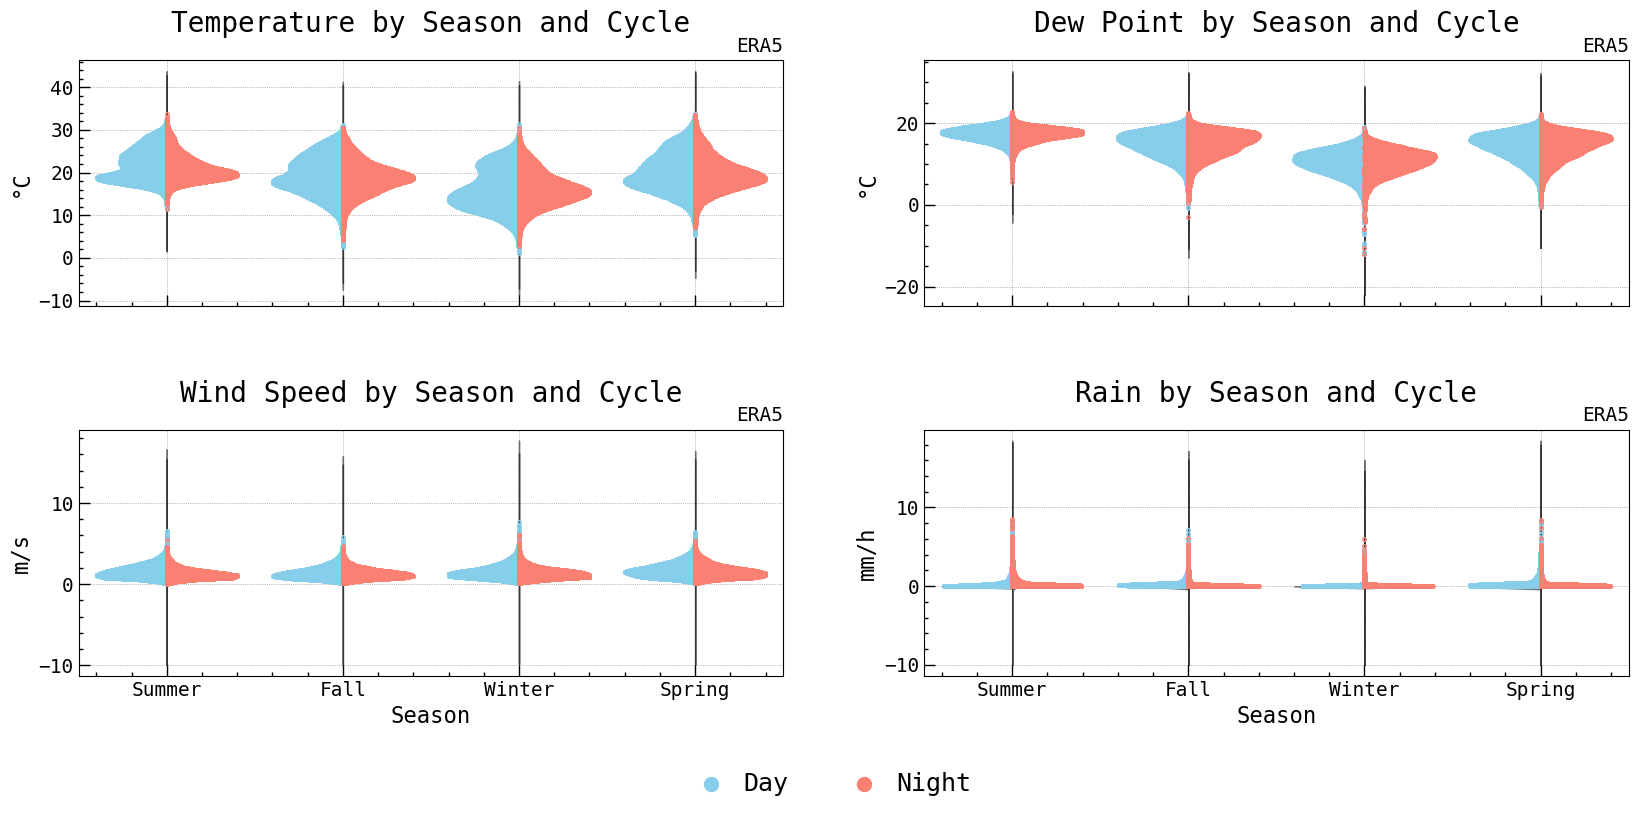

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 8), sharex=True)

variables = ['temperature_era5', 'dew_point_era5', 'wind_speed_era5', 'rain_era5']
vlabels = ['Temperature', 'Dew Point', 'Wind Speed', 'Rain']
seasons = ['Summer', 'Fall', 'Winter', 'Spring']
vunits = ['°C', '°C', 'm/s', 'mm/h']
colors_cycle = ['skyblue', 'salmon']
plot_opts = {
    'bean_show_mean': False, 
    'bean_show_median': False, 
    'cutoff_val': 10, 
    'cutoff_type': 'abs', 
    'jitter_marker':'.',
    'jitter_marker_size': 5,
    # hide the legend
    'bean_legend_text': None
}

for i, variable in enumerate(variables):
    ax = axs.flat[i]
    # Preparando os dados para os ciclos diurnos e noturnos
    day_data = era5[era5['cycle'] == 'day']
    night_data = era5[era5['cycle'] == 'night']

    day_values = [day_data[day_data['season'] == season][variable].dropna().values for season in ['Summer', 'Fall', 'Winter', 'Spring']]
    night_values = [night_data[night_data['season'] == season][variable].dropna().values for season in ['Summer', 'Fall', 'Winter', 'Spring']]

    # Certifique-se de que cada lista tenha múltiplos elementos
    day_values = [vals for vals in day_values if len(vals) > 1]
    night_values = [vals for vals in night_values if len(vals) > 1]

    # Plotar dados do ciclo diurno no lado esquerdo
    plot_opts['bean_color'] = 'skyblue' 
    # plot_opts['bean_legend_text'] = 'Day'
    if day_values:
        sm.graphics.beanplot(day_values, ax=ax, labels=seasons[:len(day_values)], side='left', jitter=True, plot_opts=plot_opts)

    # Plotar dados do ciclo noturno no lado direito
    plot_opts['bean_color'] = 'salmon'
    # plot_opts['bean_legend_text'] = 'Night'
    if night_values:
        sm.graphics.beanplot(night_values, ax=ax, labels=seasons[:len(night_values)], side='right', jitter=True, plot_opts=plot_opts)

    ax.set_title(f"{vlabels[i]} by Season and Cycle", y=1.08)
    ax.set_title("ERA5", loc='right', fontsize=14)
    ax.set_ylabel(vunits[i])
    if i > 1:
        ax.set_xlabel('Season')

plt.subplots_adjust(hspace=0.5)

# add legend below subplots center
ax2 = fig.add_axes([0.35, -0.05, 0.3, 0.05])
ax2.axis('off')
ax2.scatter([], [], color='skyblue', label='Day', s=100)
ax2.scatter([], [], color='salmon', label='Night', s=100)
ax2.legend(loc='center', ncol=2, fontsize=18)

plt.savefig('../images/season_and_cycle_era5.png', dpi=72, bbox_inches='tight')
plt.savefig('../images/season_and_cycle_era5.pdf', dpi=150, bbox_inches='tight')
